/home/jovyan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
2025-03-28 16:00:36.755703: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-28 16:00:36.797049: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-28 16:00:36.797073: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT fa

Initializing player from: /home/jovyan/machine-learning/Project_Mardeen/playergroup10.py with name: Group 10
Inizializzazione agente RL


2025-03-28 16:00:39.966107: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11678 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:3b:00.0, compute capability: 7.5
2025-03-28 16:00:39.968259: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13764 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:d8:00.0, compute capability: 7.5


[MODEL] Caricato da: ./saved_models/dicewars_rl_model_new.keras
Initializing player from standard library with name: WeakerPlayerAttacker
Initializing player from standard library with name: WeakerPlayerAttacker
Initializing player from standard library with name: PassivePlayer
['Group 10', 'WeakerPlayerAttacker', 'WeakerPlayerAttacker', 'PassivePlayer']
Winner: player 2, WeakerPlayerAttacker


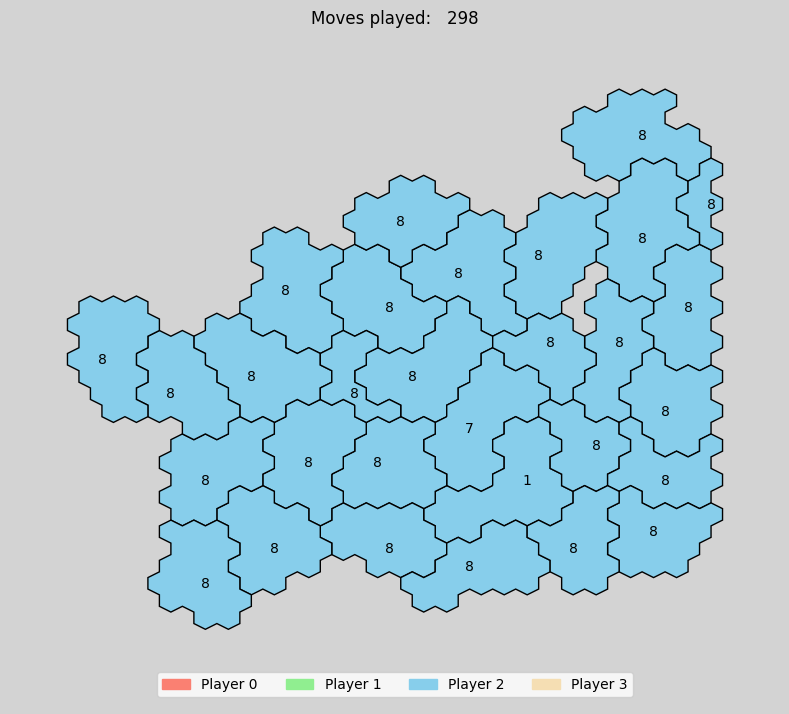

In [1]:
from dicewars.match import Match
from dicewars.game import Game
from dicewars.player import DefaultPlayer, AgressivePlayer, RandomPlayer, WeakerPlayerAttacker, PassivePlayer
from importlib import import_module

# always playing with 4 players in the game

RENDER = True

PlayerX = import_module('playergroup10').Player() 

# a list of all participating Player objects
#players = [DefaultPlayer(), AgressivePlayer(), RandomPlayer(), WeakerPlayerAttacker()]
#players = [PlayerX, AgressivePlayer(), RandomPlayer(), WeakerPlayerAttacker()]
#players = [PlayerX, AgressivePlayer(), AgressivePlayer(),AgressivePlayer()]
players = [PlayerX,WeakerPlayerAttacker(),WeakerPlayerAttacker(),PassivePlayer()]
playernames=[]
for i in range(len(players)):
    playernames.append(players[i].playername)

print(playernames)

# set up the game
game = Game(num_seats=len(players))
match = Match(game)

# # Instead of the above we can also load a previously saved match with the code below
# match = Match.load("filename")
#match = Match.load("savedmatch.save")
# # In case we would like to render this match again we might have to force drawing the board again
# # (the figure that is referred to in the match object probably no longer exists)
# match.drawboard()

# # Saving a specific match for later playback goes as follows
#match.save("savedmatch.save")


# Initialize the grid and state
grid, state = match.game.grid, match.state

# play the game until finsihed
while True:
    # get an action from the current player
    currentplayer = players[state.player]
    action = currentplayer.get_attack_areas(grid, state)
    
    grid, state = match.step(action)
#    print(match.state) 
    # render for graphical representation of gamestate
    if RENDER:
        match.render()
    
    # quit if game is finished
    if state.winner != -1:
        break

print(f"Winner: player {state.winner}, {players[state.winner].playername}")   
